# Applied Machine Learning HomeWork 1
Due 09/29/21 11:59pm

Xinyu Wang

xw2814

## Task 1: Data Visualization and Analysis

You can download the FIFA 19 complete dataset from

https://www.kaggle.com/karangadiya/fifa19

Please replace the value of PATH_TO_DATASET variable in the following block with the path to your dataset

In [1]:
# import modules, read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = './data.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()


Bad key "text.kerning_factor" on line 4 in
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


FileNotFoundError: [Errno 2] No such file or directory: './data.csv'

In [2]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

### 1.1 

Create a **scatter plot** of the Age vs Overall Rating. **Ensure the axes are labeled
properly.**

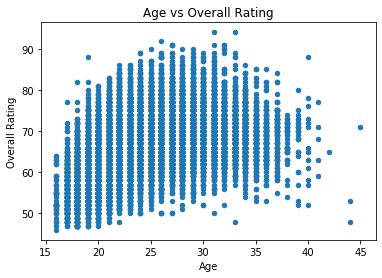

In [7]:
a = df.plot.scatter(x="Age", y="Overall")
plt.ylabel('Overall Rating')
plt.title('Age vs Overall Rating');

### 1.2

Visualize the distribution of Overall Rating as a **histogram**. 

Do a small multiples plot of whether the player's prefered foot is left, i.e. do **one plot** of Overall Rating distribution for those players prefered left foot and **a separate** for those who prefer right foot (**within the same figure on separate axes**). **Ensure the axes are labeled properly and titles are added.**

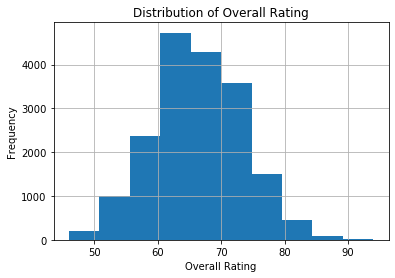

In [9]:
df_hist = df.hist(column = "Overall")
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel("Frequency");

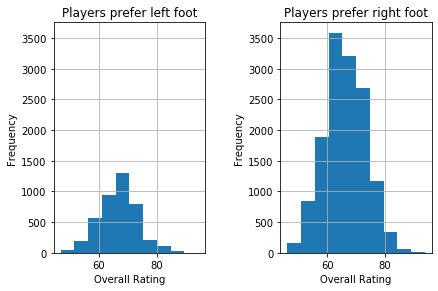

In [13]:
df_left = df[df["Preferred Foot"]=='Left']
df_right = df[df["Preferred Foot"]=='Right']
ax2 = plt.subplot(122,xlabel = "Overall Rating",alpha = 1)
ax2.hist(x = df_right['Overall'])
ax2.set_ylabel("Frequency")
ax2.set_title('Players prefer right foot')
plt.grid(True)
ax1 = plt.subplot(121,sharey=ax2,xlabel = "Overall Rating",ylabel = 'Frequency',alpha = 1)
ax1.hist(x = df_left['Overall'])
ax1.set_title('Players prefer left foot') 
plt.subplots_adjust(bottom=0.1, right=1, top=0.9, wspace = 0.5)
plt.grid(True)
plt.show()

Can you spot differences in the distributions?

Answer: Most players prefer right foot to left foot. And players who prefer right foot are more likely to be rated over 70.

### 1.3

Create a **pie chart** for distribution of Weak Foot for all the players. Get rid of players whose Weak Foot = nan. **Ensure each division is labeled properly and title is added**

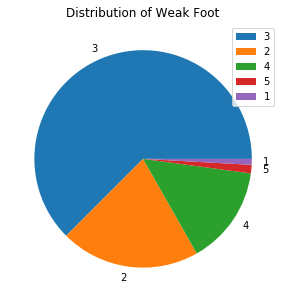

In [5]:
#YOUR CODE HERE
df_pie = df[df['Weak Foot'].notna()]
df_freq = pd.DataFrame(df_pie['Weak Foot'].value_counts())
df_freq.index = df_freq.index.astype(dtype = int)
plot = df_freq.plot(kind = 'pie',y = 'Weak Foot',figsize = (5,5),title = 'Distribution of Weak Foot',ylabel = '')

### 1.4 

Create **a boxplot and a violin plot** for distributions of players' ages in different positions (similar to plots on page 92 of Lecture 1 slide) Get rid of players whose position = nan. **Ensure the axes are labeled properly**

C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


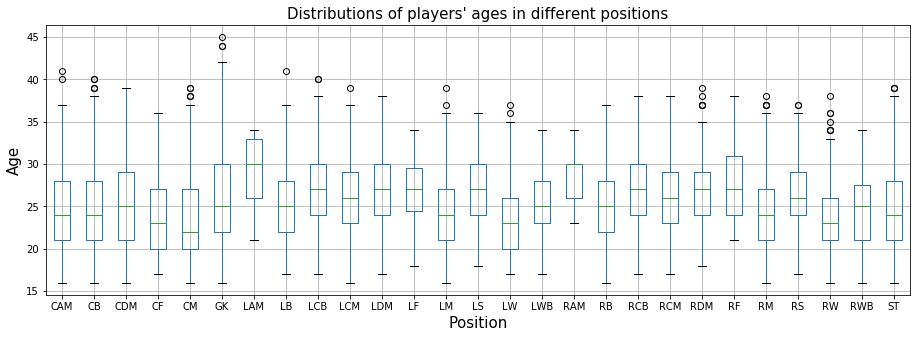

In [6]:
# Your Code Here
# Create a boxplot
fig,ax = plt.subplots(figsize = (15,5))
df_box = df[df['Position'].notna()]
box = df_box.boxplot(column = 'Age',by = 'Position',ax = ax)
fig.suptitle('')
plt.xlabel("Position",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.title("Distributions of players' ages in different positions",fontsize=15)
plt.show()

C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


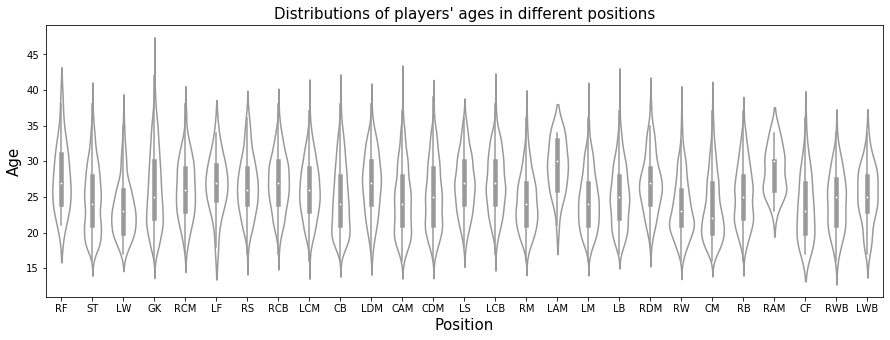

In [7]:
# Your Code Here
# Create a violin plot
fig, axes = plt.subplots(figsize = (15,5))
sns.violinplot('Position','Age', data=df_box, ax = axes,color = "white")
plt.xlabel("Position",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.title("Distributions of players' ages in different positions",fontsize=15)
plt.show()

### 1.5
Creat a **stacked bar plot** for proportions of international reputation vs. players' ages (similar to the plot on page 97 of lecture 1 slide). **Ensure the axes and bars are labeled properly**

Note that international reputation takes value from [1,2,3,4,5]. Get rid of players whose international reputation is nan. 

Ages should be treated as intervals with width 5, i.e. the x-axis labels should be: 16 to 20, 21 to 25, 26 to 30,..., 41 to 45 

C:\Users\HP\AppData\Local\Temp/ipykernel_10840/1601819458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar_label'] = pd.cut(df_bar['Age'],bins = len(x_label),labels = x_label)
C:\Users\HP\AppData\Local\Temp/ipykernel_10840/1601819458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['count'] = 1


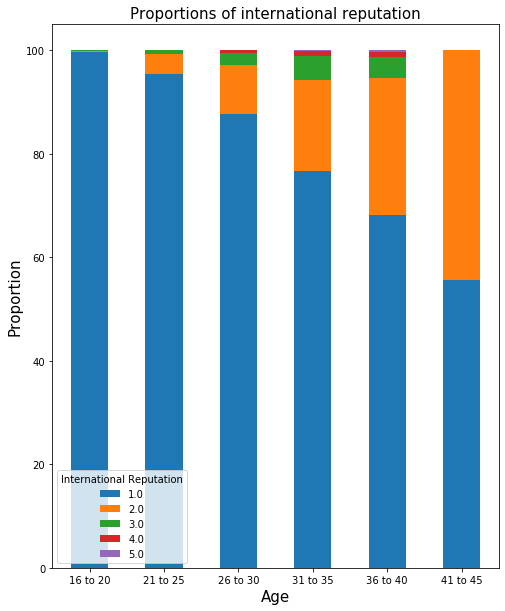

In [399]:
df_bar = df.dropna(subset = ['International Reputation'])
x_label = [str(i)+" to " +str(i+4) for i in range(min(df_bar['Age']),max(df_bar['Age']),5)]
df_bar['bar_label'] = pd.cut(df_bar['Age'],bins = len(x_label),labels = x_label)
df_bar['count'] = 1
df_stack = df_bar.groupby(['bar_label', 'International Reputation'])['count'].sum().unstack()
df_stack = df_stack.div(df_stack.sum(axis = 1),axis = 0).multiply(100)
df_stack.plot(kind='bar', stacked=True,figsize = (8,10))
plt.title('Proportions of international reputation',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Proportion',fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.show()

## Task 2: Data Preprocessing and Supervised Learning

Use the dataset_credit.csv for this task. The target variable is 'class'.

### 2.1

Load the data and understand the data distributions - pick a few features and plot their distributions.


In [333]:
# YOUR CODE HERE
PATH_TO_DATASET = './dataset_credit.csv' 
############################################################

df_credit = pd.read_csv(PATH_TO_DATASET)
df_credit.head()

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


In [11]:
# to find out whether the dataset is imbalanced
df_credit['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\_

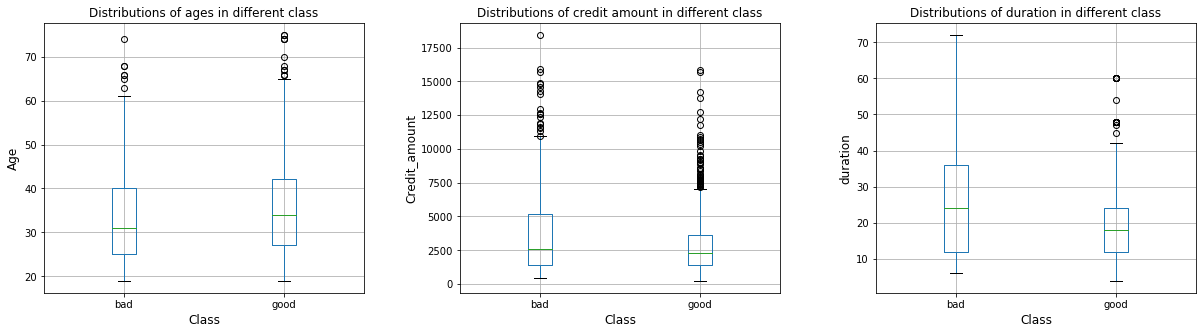

In [316]:
# the boxplot of distributions of ages in different class
# ax1 = plt.subplot(131)
fig,ax = plt.subplots(1,3,figsize = (20,5))
box = df_credit.boxplot(column = 'age',by = 'class',ax = ax[0])
fig.suptitle('')
ax[0].set_xlabel("Class",fontsize=12)
ax[0].set_ylabel("Age",fontsize=12)
ax[0].set_title("Distributions of ages in different class",fontsize=12)
# ax2 = plt.subplot(132)
box = df_credit.boxplot(column = 'credit_amount',by = 'class',ax = ax[1])
fig.suptitle('')
ax[1].set_xlabel("Class",fontsize=12)
ax[1].set_ylabel("Credit_amount",fontsize=12)
ax[1].set_title("Distributions of credit amount in different class",fontsize=12)
# ax3 = plt.subplot(133)
box = df_credit.boxplot(column = 'duration',by = 'class',ax = ax[2])
fig.suptitle('')
ax[2].set_xlabel("Class",fontsize=12)
ax[2].set_ylabel("duration",fontsize=12)
ax[2].set_title("Distributions of duration in different class",fontsize=12)
plt.subplots_adjust(wspace = 0.3)
plt.show()


C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\cbook\_

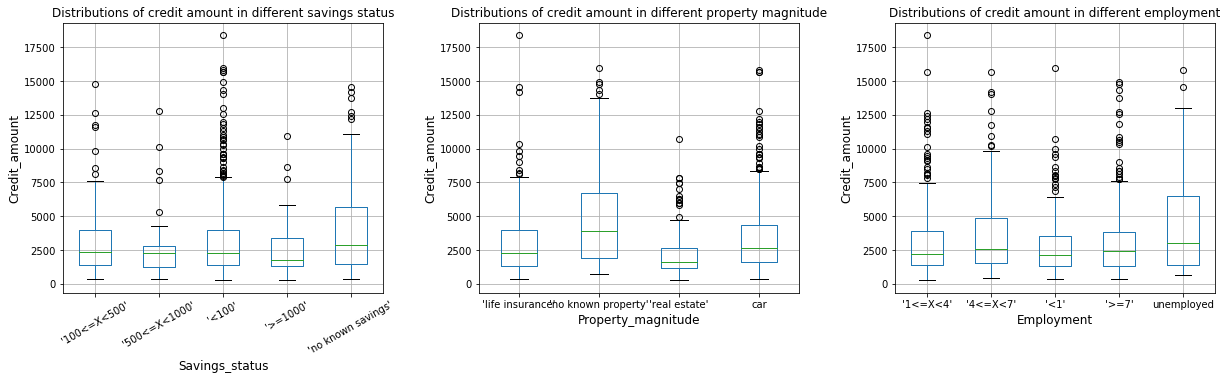

In [317]:
# the boxplot of distributions of ages in different class
# ax1 = plt.subplot(131)
fig,ax = plt.subplots(1,3,figsize = (20,5))
box = df_credit.boxplot(column = 'credit_amount',by = 'savings_status',ax = ax[0])
fig.suptitle('')
ax[0].tick_params('x',labelrotation=30)
ax[0].set_xlabel("Savings_status",fontsize=12)
ax[0].set_ylabel("Credit_amount",fontsize=12)
ax[0].set_title("Distributions of credit amount in different savings status",fontsize=12)
# ax2 = plt.subplot(132)
box = df_credit.boxplot(column = 'credit_amount',by = 'property_magnitude',ax = ax[1])
fig.suptitle('')
ax[1].set_xlabel("Property_magnitude",fontsize=12)
ax[1].set_ylabel("Credit_amount",fontsize=12)
ax[1].set_title("Distributions of credit amount in different property magnitude",fontsize=12)
# ax3 = plt.subplot(133)
box = df_credit.boxplot(column = 'credit_amount',by = 'employment',ax = ax[2])
fig.suptitle('')
ax[2].set_xlabel("Employment",fontsize=12)
ax[2].set_ylabel("Credit_amount",fontsize=12)
ax[2].set_title("Distributions of credit amount in different employment",fontsize=12)
plt.subplots_adjust( wspace = 0.3)
plt.show()


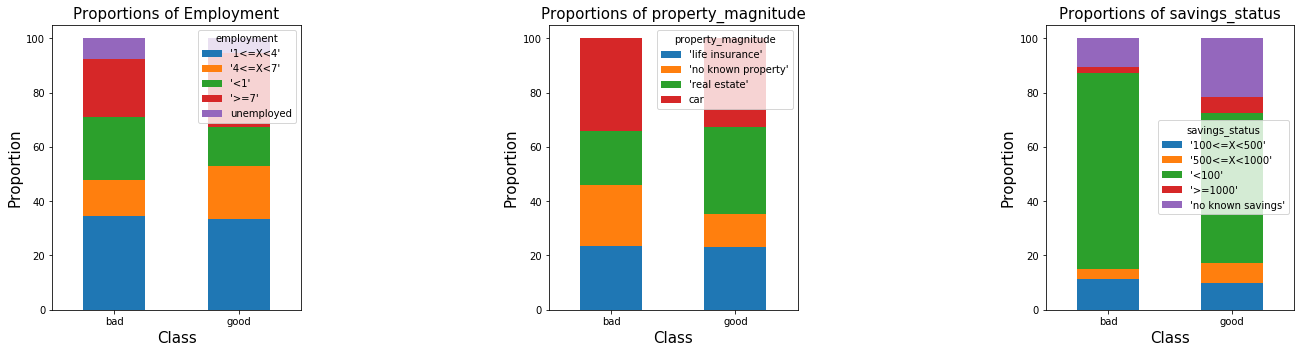

In [13]:
ax1 = plt.subplot(131)
df_credit_bar = df_credit.dropna(subset=['employment'])
df_credit_bar['count'] = 1
df_credit_stack = df_credit_bar.groupby([ 'class','employment'])['count'].sum().unstack()
df_credit_stack = df_credit_stack.div(df_credit_stack.sum(axis = 1),axis = 0).multiply(100)
df_credit_stack.plot(kind='bar', stacked=True,ax = ax1)
plt.title('Proportions of Employment',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Proportion',fontsize=15)
plt.xticks(rotation=0, ha='center')
ax2 = plt.subplot(132)
df_credit_bar = df_credit.dropna(subset=['property_magnitude'])
df_credit_bar['count'] = 1
df_credit_stack = df_credit_bar.groupby([ 'class','property_magnitude'])['count'].sum().unstack()
df_credit_stack = df_credit_stack.div(df_credit_stack.sum(axis = 1),axis = 0).multiply(100)
df_credit_stack.plot(kind='bar', stacked=True,ax = ax2)
plt.title('Proportions of property_magnitude',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Proportion',fontsize=15)
plt.xticks(rotation=0, ha='center')
ax3 = plt.subplot(133)
df_credit_bar = df_credit.dropna(subset=['savings_status'])
df_credit_bar['count'] = 1
df_credit_stack = df_credit_bar.groupby([ 'class','savings_status'])['count'].sum().unstack()
df_credit_stack = df_credit_stack.div(df_credit_stack.sum(axis = 1),axis = 0).multiply(100)
df_credit_stack.plot(kind='bar', stacked=True,ax = ax3)
plt.title('Proportions of savings_status',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Proportion',fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.subplots_adjust(bottom=0.01, right=3, top=1, wspace = 1)
plt.show()

### 2.2

**Preprocessing** - does any feature need pre-processing? Would you do any scaling to numerical features? Are there any categorical features? How would you handle the categorical features? Are there any features that has missing values? What % of values are missing in each of the features? Based on this percentages, would you consider dropping any features? How about adding a missing indicator? Would you consider adding a missing indicator column?

In [60]:
df_credit.head()

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


In [14]:
print(set(df_credit['savings_status']))
print(set(df_credit['employment']))
print(set(df_credit['own_telephone']))

{"'100<=X<500'", "'no known savings'", "'<100'", "'>=1000'", "'500<=X<1000'"}
{"'1<=X<4'", "'<1'", "'4<=X<7'", 'unemployed', "'>=7'"}
{nan, 'none', 'yes'}


In [58]:
print(df_credit.describe())

          duration  credit_amount          age
count  1000.000000     926.000000  1000.000000
mean     20.903000    3284.260259    35.546000
std      12.058814    2824.966082    11.375469
min       4.000000     250.000000    19.000000
25%      12.000000    1367.250000    27.000000
50%      18.000000    2325.500000    33.000000
75%      24.000000    3987.250000    42.000000
max      72.000000   18424.000000    75.000000


The scales of the numerical features are large, especially for 'credit_amount', so I would do scaling for these numerical features after data splitting to ensure the scaler from training step is used to transform the test data.

In [59]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            1000 non-null   int64  
 1   credit_amount       926 non-null    float64
 2   savings_status      1000 non-null   object 
 3   employment          1000 non-null   object 
 4   property_magnitude  1000 non-null   object 
 5   age                 1000 non-null   int64  
 6   own_telephone       241 non-null    object 
 7   class               1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None


So there are missing values in column 'credit_amount' and 'own_telephone'. Since the percentages of values are missing in 'own_telephone' is large (75.9%), I would add a missing indicator column for it. The percentages of values are missing in 'credit_amount' is small (0.74%), I would drop them or use mean or median to fill them.

In [343]:
"""deal with the missing data"""
df_credit['own_telephone'] = df_credit['own_telephone'].fillna("unknown") # add a missing indicator column
df_credit = df_credit.dropna(subset = ['credit_amount'])                  # drop the nan columns

In [ ]:
"""deal with the categorical features""" 
# def map_Encode(val):
#     if val<=29:
#         return "<=29"
#     elif val>29 and val<=39:
#         return "30 to 39"
#     elif val>39 and val<=49:
#         return "40 to 49"
#     elif val>49 and val<=59:
#         return "50 to 59"
#     elif val>59 and val<=69:
#         return "60 to 69"
#     else:
#         return ">69"
# df_credit['age_cat'] = df_credit['age'].map(lambda x:map_Encode(x))
"""use ordinal encoder to convert it into numbers, the values indicate the number of savings or employment years."""
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['unemployed',"'<1'","'1<=X<4'", "'4<=X<7'","'>=7'"]])
df_credit['employment_ord'] = enc.fit_transform(df_credit['employment'].to_numpy().reshape(-1,1))
enc = OrdinalEncoder(categories = [["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'"]])
df_credit['savings_status_ord'] = enc.fit_transform(df_credit['savings_status'].to_numpy().reshape(-1,1))

"""use One-hot encoding to deal with variables without any ordinal relationships"""
# dummy_age = pd.get_dummies(df_credit['age_cat'])
dummy_property = pd.get_dummies(df_credit['property_magnitude'])
dummy_tele = pd.get_dummies(df_credit['own_telephone'])
df_credit_d = pd.concat([df_credit,dummy_property,dummy_tele],axis = 1)
# df_credit_d = pd.concat([df_credit,dummy_property,dummy_tele,dummy_age],axis = 1)
df_credit_pro = df_credit_d.drop(['savings_status',"employment","property_magnitude","own_telephone"],axis = 1)
# df_credit_pro = df_credit_d.drop(['savings_status',"employment","property_magnitude","own_telephone","age_cat"],axis = 1)

I used One-hot encoding to deal with features without any ordinal relationships, like 'property_magnitude' and 'own_telephone'. Then I tried to use ordinal encoder to convert the features of 'savings_status' and 'employment' into numerical features. But the result turned out to be poorer than using One-hot encoding. Therefore, I encoded all the categorical features with One-hot encoding. The operations will be executed in 2.4.

I also tried to map 'age' to different intervals so that I could treat it as a categorical feature. But there was no improvement after this operation. So I still treated 'age' as a numerical feature.

### 2.3

**Data splitting** - Create development & test datasets.

In [345]:
# Stratified splitting
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(df_credit.drop("class",axis = 1),df_credit['class'], random_state = 40)

Give a reason on why did you use the particular splitting strategy.

Answer: The target is categorical variable and we are to perform classification task on this dataset. And the dataset is imbalanced. The ratio of the two class "good" and "bad" is 7:3. Therefore, I choose stratified splitting strategy.

### 2.4

**Model selection** - Lets use k-nearest neighbors to train a model. Pick 2 out of 4 model selection strategies discussed in class to compare the optimal k chosen from both the methods. Also compare the results from grid search v.s. random search for finding the optimal k.

In [338]:
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,RobustScaler,Normalizer,OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [339]:
"""Data processing work"""
num_features = ['duration','credit_amount','age']
ohe_features = ['savings_status',"employment","property_magnitude","own_telephone"]
preprocess = make_column_transformer((StandardScaler(),num_features),(OneHotEncoder(),ohe_features))

In [394]:
"""Skfold with Grid"""
# np.random.seed(30)
skfold = StratifiedKFold(n_splits = 10, shuffle = False)
pipe_sk_g = make_pipeline(preprocess,GridSearchCV(KNeighborsClassifier(),param_grid = [{'n_neighbors': np.arange(1,20,2)}],cv = skfold))
pipe_sk_g.fit(X_dev,y_dev)
print(f"Best stratified 10-fold cross-validation score with Grid Search:",pipe_sk_g.named_steps["gridsearchcv"].best_score_)
print(f"Best neighbor:",pipe_sk_g.named_steps["gridsearchcv"].best_params_)

Best stratified 10-fold cross-validation score with Grid Search: 0.7002070393374741
Best neighbor: {'n_neighbors': 17}


In [393]:
"""Skfold with Random"""
np.random.seed(20)
pipe_sk_r = make_pipeline(preprocess,RandomizedSearchCV(KNeighborsClassifier(),param_distributions = [{'n_neighbors': np.random.choice(np.arange(1,20),10,replace = False)}],cv = skfold))
pipe_sk_r.fit(X_dev,y_dev)
print(f"Best stratified 10-fold cross-validation score with Random Search:",pipe_sk_r.named_steps["randomizedsearchcv"].best_score_)
print(f"Best neighbor:",pipe_sk_r.named_steps["randomizedsearchcv"].best_params_)

Best stratified 10-fold cross-validation score with Random Search: 0.7002070393374741
Best neighbor: {'n_neighbors': 17}


In [390]:
"""Three-way holdout with Grid"""
np.random.seed(20)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev)
val_score = []
neighbor = np.arange(1,20,2)
for i in neighbor:
    pipe_threeway_g = make_pipeline(preprocess,KNeighborsClassifier(n_neighbors = i))
    pipe_threeway_g.fit(X_train, y_train)
    val_score.append(pipe_threeway_g.score(X_val, y_val))
print(f"Best three-way holdout score with Grid Search: {np.max(val_score):3f}")
best_neighbor_tg = neighbor[np.argmax(val_score)]
print("Best number of neighbors:",best_neighbor_tg)

Best three-way holdout score with Grid Search: 0.712644
Best number of neighbors: 5


In [392]:
"""Three-way holdout with Random"""
np.random.seed(20)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev)
val_score = []
neighbor = np.random.choice(np.arange(1,20),10,replace = False)
for i in neighbor:
    pipe_threeway_r = make_pipeline(preprocess,KNeighborsClassifier(n_neighbors = i))
    pipe_threeway_r.fit(X_train, y_train)
    val_score.append(pipe_threeway_r.score(X_val, y_val))
print(f"Best three-way holdout score with Random Search: {np.max(val_score):3f}")
best_neighbor_tr = neighbor[np.argmax(val_score)]
print("Best number of neighbors:",best_neighbor_tr)

Best three-way holdout score with Random Search: 0.712644
Best number of neighbors: 5


From the results we can find that no matter which Search strategies we choose, the neighbors k is the same under the same model selection strategy. Probably because in this case, we can only choose integer as the parameter and the searching space is relatively small. So it's likely that both Grid Search and Random Search can reach the best number under the same model selection method. There is difference between the ks under different model selection strategy. It seems that Three-way holdout has a better score, but it's not based on many samples since there is only one split and it's random. So we need to see the result on the test dataset to find which method is better for this problem. 


### 2.5

Compare the performance of 4 models (2 model selection strategies & 2 hyperparameter search strategies) on the test set. Which combination performs the best? Any reasons why this combination gives the best performance?


In [396]:
# YOUR CODE HERE
print(f"Stratified 10-fold cross-validation score with Grid Search on the test set:",pipe_sk_g.score(X_test,y_test))
print(f"stratified 10-fold cross-validation score with Random Search on the test set:",pipe_sk_r.score(X_test,y_test))
pipe_threeway_g = make_pipeline(preprocess,KNeighborsClassifier(n_neighbors = best_neighbor_tg))
pipe_threeway_g.fit(X_dev,y_dev)
print(f"Three-way holdout score with Grid Search on the test set:",pipe_threeway_g.score(X_test,y_test))
pipe_threeway_r = make_pipeline(preprocess,KNeighborsClassifier(n_neighbors = best_neighbor_tr))
pipe_threeway_r.fit(X_dev,y_dev)
print(f"Three-way holdout score with Random Search on the test set:",pipe_threeway_r.score(X_test,y_test))

Stratified 10-fold cross-validation score with Grid Search on the test set: 0.75
stratified 10-fold cross-validation score with Random Search on the test set: 0.75
Three-way holdout score with Grid Search on the test set: 0.7068965517241379
Three-way holdout score with Random Search on the test set: 0.7068965517241379


From the result, we can find that Stratified 10-fold cross-validation strategy with either Grid Search or Random Search perform the best. Cross-validation can increase the number of training samples to some extent so that the result will be more likely to be the best one. Three-way holdout only split the development dataset once, so a good score only represents the algorithm with that parameter can perform well on this split, which lacks universality. Besides, the dataset is imbalanced, so stratified cv can better fit the situation.

Grid Search and Random Search have the same performance in this problem. The probable reason is that we can only choose integer as the parameter and the searching space is relatively small.